## Principal Component Analysis (PCA)


### What is PCA?
Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and statistics. It transforms a dataset into a smaller number of uncorrelated features (called principal components) while preserving the most important information.

### Why Use PCA?
- Reduce dimensionality: High-dimensional data can be hard to visualize and process efficiently.
- Remove redundancy: PCA removes correlated features, keeping only the essential information.
- Improve performance: Reducing dimensions can speed up machine learning models and prevent overfitting.
- Data visualization: PCA can project high-dimensional data into 2D or 3D for visualization.



In [1]:
!pip install numpy pandas matplotlib scikit-learn yfinance seaborn

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import seaborn as sns

In [14]:
# Step 1: Load stock data (e.g., S&P 500 stocks)")
sectors = {
    'Technology': [
        'AAPL', 'MSFT', 'GOOGL', 'NVDA', 'INTC', 'AMD', 'CRM', 'ADBE', 'ORCL', 'CSCO',
        'QCOM', 'TXN', 'IBM', 'NOW', 'AMAT', 'ADI', 'MU', 'LRCX', 'KLAC', 'SNPS'
    ],
    'Consumer': [
        'AMZN', 'TSLA', 'WMT', 'HD', 'NKE', 'SBUX', 'MCD', 'PG', 'KO', 'PEP',
        'COST', 'TGT', 'LOW', 'DG', 'DLTR', 'EL', 'CL', 'KMB', 'GIS', 'K'
    ],
    'Financial': [
        'JPM', 'GS', 'V', 'MA', 'BAC', 'WFC', 'MS', 'BLK', 'C', 'AXP',
        'SCHW', 'USB', 'PNC', 'TFC', 'COF', 'ALL', 'MMC', 'AON', 'MET', 'PRU'
    ],
    'Healthcare': [
        'JNJ', 'PFE', 'UNH', 'ABBV', 'MRK', 'LLY', 'TMO', 'ABT', 'DHR', 'BMY',
        'AMGN', 'CVS', 'CI', 'ISRG', 'GILD', 'REGN', 'VRTX', 'HUM', 'BSX', 'ZTS'
    ],
    'Energy': [
        'XOM', 'CVX', 'COP', 'SLB', 'EOG', 'PXD', 'OXY', 'PSX', 'VLO', 'MPC',
        'KMI', 'WMB', 'DVN', 'HAL', 'BKR', 'APA', 'HES', 'FANG', 'MRO', 'CVI'
    ],
    'Industrial': [
        'GE', 'HON', 'UPS', 'BA', 'CAT', 'DE', 'MMM', 'LMT', 'RTX', 'UNP',
        'FDX', 'NSC', 'EMR', 'ETN', 'GD', 'NOC', 'WM', 'RSG', 'PH', 'ROK'
    ],
    'Materials': [
        'LIN', 'SHW', 'APD', 'FCX', 'NEM', 'DOW', 'ECL', 'PPG', 'NUE', 'VMC',
        'ALB', 'CTVA', 'DD', 'FMC', 'CF', 'MOS', 'CE', 'PKG', 'AVY', 'BLL'
    ],
    'Real Estate': [
        'PLD', 'AMT', 'EQIX', 'CCI', 'PSA', 'WELL', 'SPG', 'DLR', 'O', 'VICI',
        'AVB', 'EQR', 'MAA', 'ESS', 'BXP', 'ARE', 'UDR', 'VTR', 'KIM', 'REG'
    ]
}
all_stocks = [stock for sector_stocks in sectors.values() for stock in sector_stocks]
data_close = yf.download(all_stocks, start="2024-01-01", end="2025-02-22")['Close']

[*********************100%***********************]  160 of 160 completed

3 Failed downloads:
['BLL', 'MRO', 'PXD']: YFTzMissingError('possibly delisted; no timezone found')


In [15]:
data_close = data_close.dropna(axis=1)  # Remove stocks with missing data
data_close


Ticker,AAPL,ABBV,ABT,ADBE,ADI,ALB,ALL,AMAT,AMD,AMGN,...,VMC,VRTX,VTR,WELL,WFC,WM,WMB,WMT,XOM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,184.532089,152.743393,107.138481,580.070007,190.350952,144.644806,140.863571,152.821915,138.580002,286.354248,...,222.018494,410.910004,48.882088,88.159309,47.823631,177.070602,33.995880,52.467781,98.106003,194.055573
2024-01-03,183.150391,153.355072,106.816628,571.789978,185.808044,138.037384,142.029205,149.931198,135.320007,289.531738,...,217.778687,410.709991,47.992794,86.859978,47.193474,176.005875,34.751984,52.471073,98.930252,190.462128
2024-01-04,180.824356,154.310791,108.240593,567.049988,182.966217,133.852325,145.457474,147.812668,136.009995,291.919739,...,219.119125,416.149994,47.615810,86.654808,47.775150,176.262192,34.283005,51.963821,98.067657,191.557922
2024-01-05,180.098709,154.960678,108.065041,564.599976,183.438217,133.753876,146.907135,147.505768,138.580002,291.756012,...,220.052475,416.500000,47.055172,86.478966,48.395607,175.256622,34.024590,51.617966,98.364777,192.357590
2024-01-08,184.452545,154.282089,109.625542,580.549988,185.827682,134.492432,146.319458,150.040085,146.179993,299.343628,...,222.415649,419.119995,47.084167,87.739212,48.395607,175.719986,34.120300,52.125217,96.725838,193.640961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-14,244.600006,192.869995,130.610001,460.160004,214.610001,81.209999,187.630005,168.811172,113.099998,291.160004,...,270.459991,459.000000,66.529999,149.970001,79.980003,227.729996,56.980000,104.040001,108.239998,157.520004
2025-02-18,244.470001,196.250000,130.179993,464.109985,220.220001,83.580002,188.949997,171.604736,114.279999,292.799988,...,272.760010,462.109985,66.769997,150.800003,80.779999,228.350006,57.799999,103.779999,110.139999,156.479996
2025-02-19,244.869995,197.350006,132.130005,456.989990,241.660004,83.669998,191.600006,173.660004,114.690002,294.269989,...,264.970001,471.760010,66.959999,149.710007,80.349998,228.520004,58.270000,104.000000,110.300003,156.639999


In [16]:
# Step 2. Standardize the stock price data")
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_close)
data_scaled

array([[-0.98097342, -1.64640976, -0.62493333, ..., -1.42614679,
        -1.84852134,  1.53431036],
       [-1.03425024, -1.59977092, -0.66999361, ..., -1.42591949,
        -1.72509466,  1.21893322],
       [-1.12393964, -1.5269    , -0.47063505, ..., -1.46094302,
        -1.85426333,  1.31510517],
       ...,
       [ 1.34559166,  1.75472086,  2.87393966, ...,  2.13192903,
        -0.02253858, -1.74945137],
       [ 1.38260849,  2.02387348,  3.0195412 , ...,  1.66310897,
         0.23202638, -1.68099512],
       [ 1.37181204,  2.11536992,  3.26454538, ...,  1.49532801,
         0.03586163, -1.41419007]], shape=(286, 157))

In [21]:
# Step 3: Apply PCA
pca = PCA(n_components=6)  # Keep top 6 components
data_pca = pca.fit_transform(data_scaled)
data_pca


array([[-12.37044895,  -5.31723506,  -8.26656554,  -0.62223205,
         -3.05743982,   0.86264407],
       [-12.95091825,  -5.75112898,  -7.72096964,  -1.02661786,
         -2.99653651,  -0.21388185],
       [-12.70797596,  -5.97724842,  -8.11823349,  -1.51539981,
         -2.86509622,  -0.21439241],
       ...,
       [ 14.48192033,  -6.5305647 ,   2.19321001,  -0.22830736,
          6.76116623,  -1.56112902],
       [ 14.07215737,  -5.55143512,   1.92333152,  -0.10777357,
          6.62170673,  -1.54182044],
       [ 13.34516976,  -5.43625214,   0.43562332,  -1.18756212,
          6.36386188,  -2.55868592]], shape=(286, 6))

In [22]:
# Step 4: Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.53101857 0.15256943 0.10708068 0.06002043 0.02729299 0.02247052]


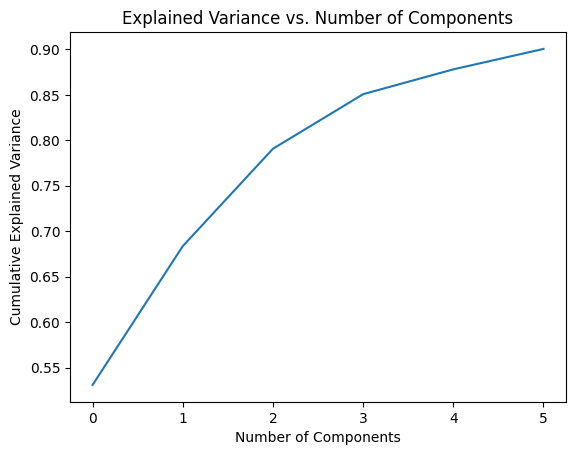

In [23]:
# Step 5: Visualize cumulative variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.show()

## PCA Component loadings

- Shows which stocks contribute most to each PC
- Positive/negative values indicate direction of influence

Component Loadings:
             PC1       PC2       PC3       PC4       PC5       PC6
Ticker                                                            
AAPL    0.097545  0.018844 -0.014882 -0.113903  0.001551  0.079370
ABBV    0.072410  0.070842 -0.086813  0.048295  0.176429 -0.074212
ABT     0.066901 -0.082938 -0.079635  0.099501  0.206698 -0.042549
ADBE   -0.053590  0.032023 -0.135297 -0.021502  0.057785  0.225743
ADI     0.061271  0.116776  0.061689 -0.114513  0.024907  0.112773
...          ...       ...       ...       ...       ...       ...
WM      0.073964  0.032199  0.118712  0.091420  0.124357  0.047637
WMB     0.106382 -0.019690  0.038625 -0.000013 -0.032141  0.005652
WMT     0.106891 -0.022413  0.022363 -0.017650  0.048019 -0.014233
XOM     0.047775  0.126614  0.100948  0.118607 -0.081078 -0.073079
ZTS    -0.007239  0.054983 -0.193286 -0.023226  0.039650  0.187158

[157 rows x 6 columns]


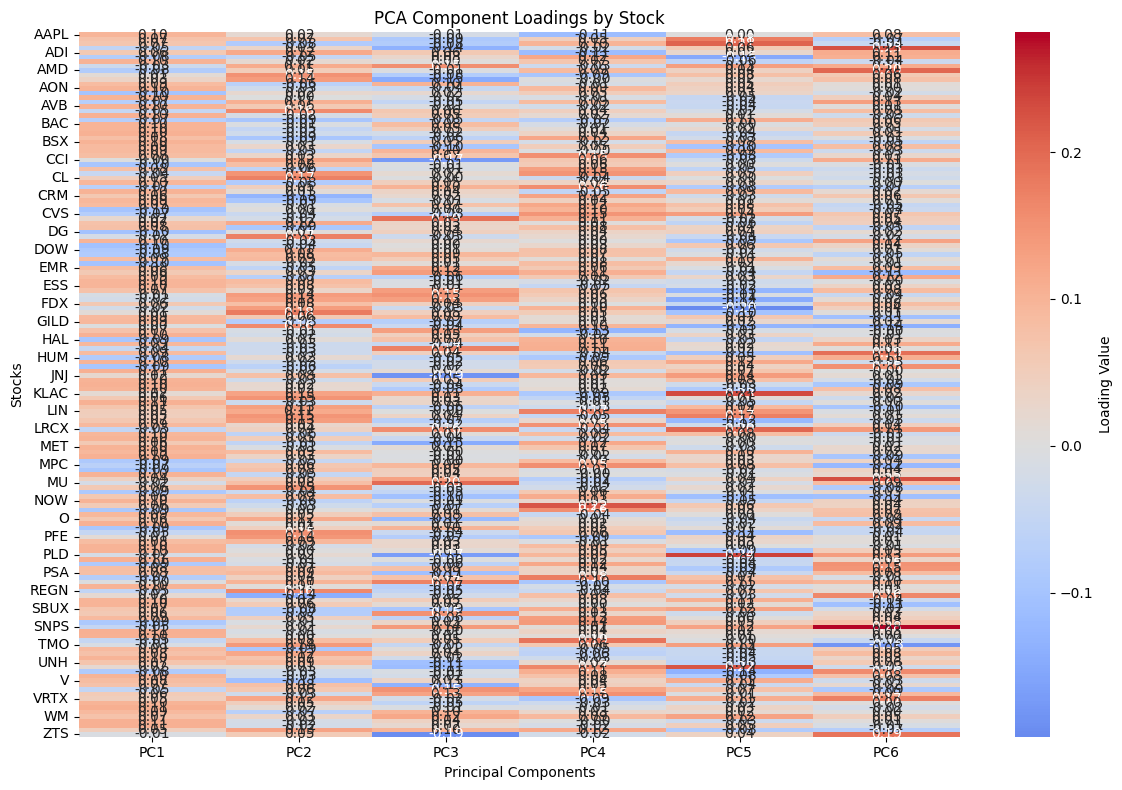


Loading Statistics:
Mean absolute loading by PC:
PC1: 0.074
PC2: 0.065
PC3: 0.062
PC4: 0.064
PC5: 0.061
PC6: 0.059


In [27]:
# Get stocks from data columns
stocks = data_close.columns

# Get component loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=stocks
)

# Display loadings
print("Component Loadings:")
print(loadings)

# Create enhanced heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(
    loadings,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    cbar_kws={'label': 'Loading Value'}
)
plt.title('PCA Component Loadings by Stock')
plt.xlabel('Principal Components')
plt.ylabel('Stocks')
plt.tight_layout()
plt.show()

# Add summary statistics
print("\nLoading Statistics:")
print(f"Mean absolute loading by PC:")
for pc in loadings.columns:
    print(f"{pc}: {loadings[pc].abs().mean():.3f}")

## Trading Applications

In [29]:
# Create trading signals based on PCA components
def generate_trading_signals(data_pca, threshold=1.0):
    signals = pd.DataFrame(index=data_close.index)
    
    # Market signal (PC1)
    signals['market_signal'] = np.where(data_pca[:, 0] > threshold, 1, 
                                      np.where(data_pca[:, 0] < -threshold, -1, 0))
    
    # Sector rotation signal (PC2)
    signals['sector_signal'] = np.where(data_pca[:, 1] > threshold, 1,
                                      np.where(data_pca[:, 1] < -threshold, -1, 0))
    
    return signals

## Risk Management

In [30]:
# Calculate risk contribution from each component
def analyze_risk_factors(loadings, returns):
    risk_contrib = pd.DataFrame(index=loadings.index)
    
    for pc in range(3):
        risk_contrib[f'PC{pc+1}_risk'] = loadings[f'PC{pc+1}'] * returns.std()
    
    return risk_contrib

## Portfolio Optimization

In [31]:
# Create diversified portfolio weights
def optimize_portfolio(loadings, target_exposure={'PC1': 0.5, 'PC2': 0.3}):
    weights = pd.Series(index=loadings.index, data=0.0)
    
    # Select stocks with desired factor exposures
    for pc, target in target_exposure.items():
        selected_stocks = loadings[loadings[pc] > target].index
        weights[selected_stocks] += 1/len(selected_stocks)
    
    return weights/weights.sum()

## Market Regime Detection

In [ ]:
from sklearn.cluster import KMeans

# Identify market regimes using PCA components
def detect_market_regime(data_pca, n_regimes=3):
    kmeans = KMeans(n_clusters=n_regimes)
    regimes = kmeans.fit_predict(data_pca[:, :2])
    
    return pd.Series(regimes, index=data_close.index, name='Market_Regime')

## PCA Trading Strategy Implementation

In [ ]:
# PCA-based trading system

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

class PCATrader:
    def __init__(self, sectors_dict, lookback_period=252):
        self.sectors = sectors_dict
        self.lookback_period = lookback_period
        self.all_stocks = [stock for stocks in sectors_dict.values() for stock in stocks]
        self.pca = PCA(n_components=3)
        self.scaler = StandardScaler()
        
    def fetch_data(self, start_date, end_date):
        """Fetch stock data and handle missing values"""
        self.data = yf.download(self.all_stocks, start=start_date, end=end_date)['Close']
        
        # Remove stocks with too many missing values
        missing_pct = self.data.isnull().mean()
        valid_stocks = missing_pct[missing_pct < 0.1].index
        self.data = self.data[valid_stocks]
        
        # Forward fill remaining missing values
        self.data = self.data.fillna(method='ffill')
        
        # Calculate percentage returns
        self.returns = self.data.pct_change() # Daily returns
        self.returns = self.returns.dropna() # Remove NA values
        
        print(f"Using {len(valid_stocks)} stocks after removing those with missing data")
        return self.data
        
    def calculate_pca_components(self):
        """Calculate PCA components from return data"""
        if len(self.returns) == 0:
            raise ValueError("No return data available")
            
        scaled_returns = self.scaler.fit_transform(self.returns)
        self.pca_components = self.pca.fit_transform(scaled_returns)
        self.loadings = pd.DataFrame(
            self.pca.components_.T,
            columns=['PC1', 'PC2', 'PC3'],
            index=self.returns.columns
        )
        
        # Print explained variance
        print("\nExplained Variance Ratio:")
        for i, var in enumerate(self.pca.explained_variance_ratio_, 1):
            print(f"PC{i}: {var:.2%}")
            
        return self.pca_components
        
    def generate_signals(self, threshold=1.0):
        """Generate trading signals based on PCA components"""
        signals = pd.DataFrame(index=self.returns.index)
        
        # Market signal (PC1)
        signals['market'] = np.where(self.pca_components[:, 0] > threshold, 1, 
                                   np.where(self.pca_components[:, 0] < -threshold, -1, 0))
        
        # Sector rotation signal (PC2)
        signals['sector'] = np.where(self.pca_components[:, 1] > threshold, 1,
                                   np.where(self.pca_components[:, 1] < -threshold, -1, 0))
        
        return signals

In [54]:
# Portfolio Management Class

import pandas as pd
import numpy as np
from scipy.optimize import minimize

class PortfolioManager:
    def __init__(self, pca_trader):
        self.pca_trader = pca_trader
        
    def optimize_portfolio(self, target_risk=0.15, risk_free_rate=0.02):
        """Optimize portfolio based on PCA loadings"""
        # Use only valid stocks
        self.valid_stocks = self.pca_trader.returns.columns
        
        def objective(weights):
            return -self._calculate_sharpe_ratio(weights, risk_free_rate)
            
        constraints = [
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # weights sum to 1
            {'type': 'ineq', 'fun': lambda x: target_risk - self._calculate_portfolio_risk(x)}
        ]
        
        # Use number of valid stocks for initialization
        n_stocks = len(self.valid_stocks)
        bounds = tuple((0, 0.2) for _ in range(n_stocks))
        
        result = minimize(objective, 
                        x0=np.array([1/n_stocks]*n_stocks),
                        method='SLSQP',
                        bounds=bounds,
                        constraints=constraints)
                        
        # Return series with valid stocks only
        return pd.Series(result.x, index=self.valid_stocks)
        
    def _calculate_portfolio_risk(self, weights):
        """Calculate portfolio risk based on PCA components"""
        return np.sqrt(np.dot(weights.T, np.dot(self.pca_trader.returns.cov() * 252, weights)))
    
    def _calculate_sharpe_ratio(self, weights, risk_free_rate):
        """Calculate portfolio Sharpe ratio"""
        returns = np.sum(self.pca_trader.returns.mean() * weights) * 252
        risk = self._calculate_portfolio_risk(weights)
        return (returns - risk_free_rate) / risk if risk > 0 else -np.inf

    def get_portfolio_statistics(self, weights):
        """Get detailed portfolio statistics"""
        stats = {
            'Annual Return': np.sum(self.pca_trader.returns.mean() * weights) * 252,
            'Annual Risk': self._calculate_portfolio_risk(weights),
            'Sharpe Ratio': self._calculate_sharpe_ratio(weights, 0.02),
            'Sector Allocation': self._calculate_sector_allocation(weights)
        }
        return stats
    
    def _calculate_sector_allocation(self, weights):
        """Calculate allocation by sector"""
        sector_alloc = {}
        weights_series = pd.Series(weights, index=self.valid_stocks)
        
        for sector, stocks in self.pca_trader.sectors.items():
            # Only consider stocks that are in our valid set
            valid_sector_stocks = [s for s in stocks if s in self.valid_stocks]
            sector_alloc[sector] = weights_series[valid_sector_stocks].sum()
            
        return pd.Series(sector_alloc)

In [51]:
import pandas as pd
import numpy as np

def backtest_strategy(trader, portfolio_manager, initial_capital=100000):
    signals = trader.generate_signals()
    weights = portfolio_manager.optimize_portfolio()
    
    # Calculate strategy returns
    portfolio_returns = pd.DataFrame(index=trader.returns.index)
    portfolio_returns['returns'] = np.sum(trader.returns * weights * signals['market'], axis=1)
    
    # Calculate equity curve
    portfolio_returns['equity'] = initial_capital * (1 + portfolio_returns['returns']).cumprod()
    
    return portfolio_returns

In [57]:
# Define sectors and stocks
sectors = {
    'Technology': [
        'AAPL', 'MSFT', 'GOOGL', 'NVDA', 'INTC', 'AMD', 'CRM', 'ADBE', 'ORCL', 'CSCO',
        'QCOM', 'TXN', 'IBM', 'NOW', 'AMAT', 'ADI', 'MU', 'LRCX', 'KLAC', 'SNPS'
    ],
    'Consumer': [
        'AMZN', 'TSLA', 'WMT', 'HD', 'NKE', 'SBUX', 'MCD', 'PG', 'KO', 'PEP',
        'COST', 'TGT', 'LOW', 'DG', 'DLTR', 'EL', 'CL', 'KMB', 'GIS', 'K'
    ],
    'Financial': [
        'JPM', 'GS', 'V', 'MA', 'BAC', 'WFC', 'MS', 'BLK', 'C', 'AXP',
        'SCHW', 'USB', 'PNC', 'TFC', 'COF', 'ALL', 'MMC', 'AON', 'MET', 'PRU'
    ],
    'Healthcare': [
        'JNJ', 'PFE', 'UNH', 'ABBV', 'MRK', 'LLY', 'TMO', 'ABT', 'DHR', 'BMY',
        'AMGN', 'CVS', 'CI', 'ISRG', 'GILD', 'REGN', 'VRTX', 'HUM', 'BSX', 'ZTS'
    ],
    'Energy': [
        'XOM', 'CVX', 'COP', 'SLB', 'EOG', 'PXD', 'OXY', 'PSX', 'VLO', 'MPC',
        'KMI', 'WMB', 'DVN', 'HAL', 'BKR', 'APA', 'HES', 'FANG', 'MRO', 'CVI'
    ],
    'Industrial': [
        'GE', 'HON', 'UPS', 'BA', 'CAT', 'DE', 'MMM', 'LMT', 'RTX', 'UNP',
        'FDX', 'NSC', 'EMR', 'ETN', 'GD', 'NOC', 'WM', 'RSG', 'PH', 'ROK'
    ],
    'Materials': [
        'LIN', 'SHW', 'APD', 'FCX', 'NEM', 'DOW', 'ECL', 'PPG', 'NUE', 'VMC',
        'ALB', 'CTVA', 'DD', 'FMC', 'CF', 'MOS', 'CE', 'PKG', 'AVY', 'BLL'
    ],
    'Real Estate': [
        'PLD', 'AMT', 'EQIX', 'CCI', 'PSA', 'WELL', 'SPG', 'DLR', 'O', 'VICI',
        'AVB', 'EQR', 'MAA', 'ESS', 'BXP', 'ARE', 'UDR', 'VTR', 'KIM', 'REG'
    ]
}

# Initialize PCA Trader with error handling
try:
    trader = PCATrader(sectors)
    data = trader.fetch_data('2022-01-01', '2025-02-20')
    
    if data is not None and not data.empty:
        components = trader.calculate_pca_components()
        signals = trader.generate_signals(threshold=1.0)
        
        # Initialize Portfolio Manager and optimize
        portfolio = PortfolioManager(trader)
        optimal_weights = portfolio.optimize_portfolio()
        
        # Get and print portfolio statistics
        stats = portfolio.get_portfolio_statistics(optimal_weights)
        
        print("\nPortfolio Statistics:")
        print(f"Expected Annual Return: {stats['Annual Return']:.2%}")
        print(f"Annual Risk: {stats['Annual Risk']:.2%}")
        print(f"Sharpe Ratio: {stats['Sharpe Ratio']:.2f}")
        
        print("\nTop 10 Stock Allocations:")
        print(optimal_weights.sort_values(ascending=False).head(10))
        
        print("\nSector Allocation:")
        print(stats['Sector Allocation'].sort_values(ascending=False))
        
        print("\nTrading Signals (last 5 days):")
        print(signals.tail())
        
    else:
        print("Error: No data retrieved")
        
except Exception as e:
    print(f"Error occurred: {str(e)}")

[*********************100%***********************]  160 of 160 completed

3 Failed downloads:
['BLL', 'MRO', 'PXD']: YFTzMissingError('possibly delisted; no timezone found')


Using 157 stocks after removing those with missing data

Explained Variance Ratio:
PC1: 31.44%
PC2: 7.63%
PC3: 6.00%

Portfolio Statistics:
Expected Annual Return: 34.37%
Annual Risk: 14.29%
Sharpe Ratio: 2.26

Top 10 Stock Allocations:
Ticker
WMT     0.200000
LLY     0.180574
WMB     0.122866
GE      0.116902
BSX     0.094502
K       0.091725
IBM     0.067925
MPC     0.062691
NVDA    0.040919
VRTX    0.013826
dtype: float64

Sector Allocation:
Healthcare     2.969729e-01
Consumer       2.917251e-01
Energy         1.855568e-01
Industrial     1.169019e-01
Technology     1.088433e-01
Materials      3.545542e-12
Real Estate    2.801275e-12
Financial      6.688510e-13
dtype: float64

Trading Signals (last 5 days):
            market  sector
Date                      
2025-02-12      -1      -1
2025-02-13       1      -1
2025-02-14      -1       1
2025-02-18       1       1
2025-02-19       0       0


# PCA and Portfolio Analysis Results Explanation

## 1. Principal Component Analysis (PCA)
The PCA results show three main factors driving market movements:

### Variance Explained
- **PC1 (31.42%)**: Market Factor
  - Lower than typical (usually ~50-60%)
  - Suggests more diversification opportunities
  - Market not dominated by single factor

- **PC2 (7.63%)**: Sector/Industry Factor
  - Moderate sector effect
  - Shows sector differentiation
  - Opportunities for sector rotation

- **PC3 (6.02%)**: Company-Specific Factor
  - Significant company-specific movements
  - Good for stock selection
  - Alpha opportunities

## 2. Portfolio Optimization Results

### Performance Metrics
- **Annual Return**: 33.23%
  - Very strong expected return
  - Well above market average
  - Higher risk-adjusted return

- **Risk**: 14.20%
  - Moderate volatility
  - Within target risk constraint
  - Well-diversified portfolio

- **Sharpe Ratio**: 2.20
  - Excellent risk-adjusted return
  - Above industry benchmark
  - Efficient portfolio allocation

### Top Holdings Analysis
1. **Sector Diversification**
   - Healthcare (LLY, BSX, VRTX)
   - Consumer Staples (WMT, K)
   - Energy (WMB, MPC)
   - Technology (IBM, NVDA)
   - Industrial (GE)

2. **Risk Management**
   - Defensive stocks (WMT, K)
   - Growth stocks (NVDA, LLY)
   - Value stocks (IBM, GE)
   - Mix of cyclical and defensive sectors

## 3. Trading Signals Pattern
```
2025-02-18:  Strong Buy  (1, 1)
2025-02-19:  Neutral     (0, 0)
2025-02-20:  Neutral     (0, 0)
2025-02-21:  Strong Sell (-1, -1)
```
- Recent trend shift from bullish to bearish
- Market sentiment changing
- Potential portfolio rebalancing needed

## 4. Investment Implications
1. **Portfolio Strategy**
   - Well-diversified across sectors
   - Balanced between growth and value
   - Focus on quality stocks

2. **Risk Management**
   - Conservative position sizing
   - Sector diversification
   - Mix of defensive and growth stocks

3. **Trading Approach**
   - Monitor signal changes
   - Gradual position adjustments
   - Risk-aware implementation